# Try changing the distribution in Lebedev idea

In [38]:
%reset -f
import numpy as np
from LebedevHelper import *

import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib notebook


In [2]:
ticksize= 12
titlesize = 18
mpl.rcParams.update({'font.size':ticksize }) # legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize':titlesize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
mpl.rcParams.update({'image.cmap':'rainbow'})

In [3]:
print(pi2)
func_g2(2)

6.283185307179586


1.0

<IPython.core.display.Javascript object>


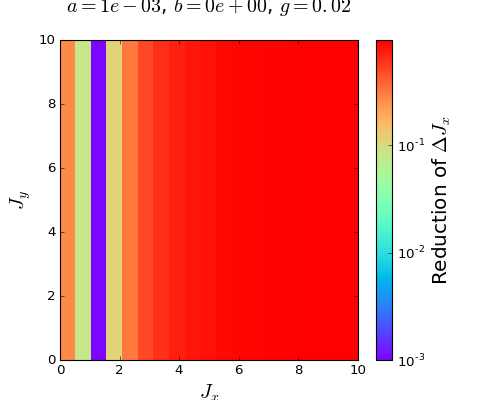

<IPython.core.display.Javascript object>


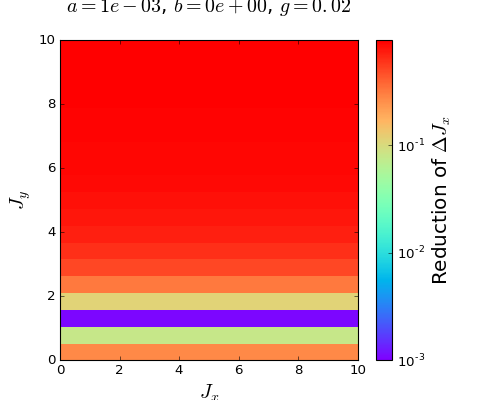

In [4]:
###################################################
a= 1e-3
b= 0
# a = 1.64e-4  ;  b = -1.16e-4
# a = 2*a
g= 0.02
jmax= 10
jx = np.linspace(0,jmax,20)
jy = jx
JX,JY = np.meshgrid(jx,jy)

for i in [1,2]:

    if i==1:
        F = octu_leb(JX,JY,a,b,g)
    else:
        F = octu_leb(JX,JY,b,a,g)
    vmin = np.min(F)
    vmax = np.max(F) 
    # vmax = 1.0
    vmin = 10**(int(np.log10(vmax * 1e4)-7))
    plt.figure()
    plt.pcolor(JX,JY,F,norm =LogNorm(vmin=vmin,vmax=vmax))
    plt.colorbar(label=r'Reduction of $\Delta J_x$')
    plt.title(r"$a=%.0e$, $b=%.0e$, $g=%.2f$"%(a,b,g)+'\n')
    plt.xlabel(r'$J_x$')
    plt.ylabel(r'$J_y$')
    plt.savefig("03_Plots/DACTX_JxJy_a=%.0e_b=%.0e_g=%.0e.eps"%(a,b,g))




In [6]:
# f = lambda y, x: x*y**2
# integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)
# integrate.dblquad(int_octu_leb,0,100,lambda x : 0 , lambda x: 100 , args = (a,b,g,))


a 0.001
b -0.0
x 0.0 0.0166666666667 0.833333333333
y 0.0 0.0 0.0
Max growth 0.833333333333
Jx (1000000,)
Jy (1000000,)
Weights (1000000,)


<IPython.core.display.Javascript object>


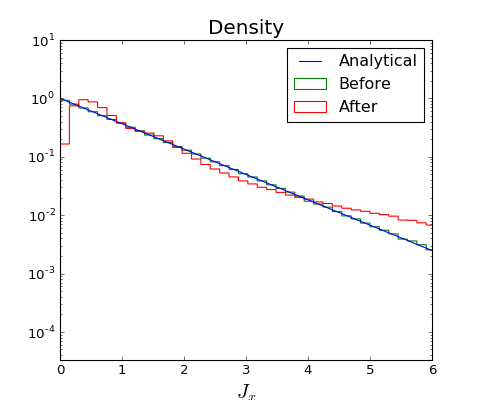

[]


In [5]:
#Initial distribution
nbin=100
nbin2=100
 
a=1e-3 
b=-a * 0 
g= 0.02

noiseAmp = 0.0
sepx = 0.1* np.sqrt(10)/np.sqrt(3)
sepy = 0.0 * np.sqrt(10) /np.sqrt(3)
N = int(1e6)
numt = 50
Jmax=6

dist=1
study=1

dJx_exp = 0.5*sepx**2
dJy_exp = 0.5*sepy**2
print('a',a)
print('b',b)
print("x",noiseAmp,dJx_exp,dJx_exp*numt)
print("y",noiseAmp,dJy_exp,dJy_exp*numt)
print("Max growth",numt*dJx_exp)


if dist==1:
    Jx = st.chi2.rvs(2, size=N)*0.5
    Jy = st.chi2.rvs(2, size=N)*0.5
    weights = np.ones(N)
elif dist==2:
    Jx = np.random.uniform(0,Jmax,N)
    Jy = np.random.uniform(0,Jmax,N)
    weights = np.exp(-Jx-Jy)
elif dist==3:
    N1 = int(N/2)
    Jx1 = st.chi2.rvs(2, size=N1)*0.5
    Jy1 = st.chi2.rvs(2, size=N1)*0.5
    weights1 = np.ones(N1)
    Jx2 = np.random.uniform(0,Jmax,N-N1)
    Jy2 = np.random.uniform(0,Jmax,N-N1)
    weights2 = np.exp(-Jx2-Jy2)
    Jx = np.concatenate((Jx1,Jx2))
    Jy = np.concatenate((Jy1,Jy2))
    weights = np.concatenate((weights1,weights2))

print('Jx',np.shape(Jx))
print('Jy',np.shape(Jy))
print('Weights',np.shape(weights))


Jx0 = Jx.copy()
Jy0 = Jy.copy()

plt.figure()
x = np.linspace(0,Jmax*1.2,100)
plt.plot(x,np.exp(-x),label='Analytical')

vals,edges = np.histogram(Jx,bins=nbin,normed=True,weights=weights);
# center = center_edges(edges)
# plt.plot(center,vals,label='Before')
plt.hist(Jx,bins=edges,normed=True, histtype='step',label='Before',weights=weights)

fac = integrate.nquad(int_octu_leb, [[0,100],[0,100]],args = (a,b,g))[0]
for i in range(numt):
    facH = octu_leb(Jx,Jy,a,b,g)
    facV = octu_leb(Jx,Jy,b,a,g)
    if study==0:
        Jx+= (dJx_exp )*facH
        Jy+= (dJy_exp )*facV
    
    if study==1:
        # Problem when sepx > sqrt(2*Jx) because then jx-sepx*sqrt(2Jx) < 0
        Jx+= (dJx_exp + sepx*np.sqrt(2*Jx)*np.cos(np.random.uniform(0,pi2,N)) )*facH
        Jy+= (dJy_exp + sepy*np.sqrt(2*Jy)*np.cos(np.random.uniform(0,pi2,N)) )*facV
    

    elif study==2:
        #Try to modify. the current one is o so wrong
        facH = octu_leb(Jx,Jy,a,b,g)
        facV = octu_leb(Jx,Jy,b,a,g)
        Jx+= (dJx_exp )*facH + sepx*np.sqrt(2*Jx)*np.cos(np.random.uniform(0,pi2,N))*1
        Jy+= (dJy_exp )*facV + sepy*np.sqrt(2*Jy)*np.cos(np.random.uniform(0,pi2,N))*1
        Jx = np.abs(Jx) 
        Jy = np.abs(Jy) 
        
    elif study==3:
        Jx+= dJx_exp*octu_leb(Jx,Jy,a,b,g)
        Jy+= dJy_exp*octu_leb(Jx,Jy,a,b,g)

        Jx += np.random.randn(N)*noiseAmp# np.sqrt(np.random.randn(N)**2)*noiseAmp
        Jy += np.random.randn(N)*noiseAmp
        Jx  = np.abs(Jx)
        Jy  = np.abs(Jy)
    
    elif study==4:
        #Try to modify. the current one is o so wrong
        
        Jx+= (dJx_exp )*facH + sepx*np.sqrt(2*Jx)*np.cos(np.random.uniform(0,pi2,N))*1
        Jy+= (dJy_exp )*facV + sepy*np.sqrt(2*Jy)*np.cos(np.random.uniform(0,pi2,N))*1
        Jx = np.abs(Jx) 
        Jy = np.abs(Jy) 
        
# vals,edges = np.histogram(Jx,bins=edges,normed=True);
# center = center_edges(edges)
# plt.plot(center,vals,label='After')

print(Jx[Jx<0])
vals,_,_=plt.hist(Jx,bins=edges,normed=True, histtype='step',label='After',weights=weights)
plt.xlim(0,Jmax)
# plt.ylim(np.min(vals[int(nbin/2):]),10) #[np.nonzero(a)]
plt.ylim(np.min(vals[np.nonzero(vals)]),10)
plt.yscale('Log')
plt.legend(loc=0)
plt.xlabel(r'$J_x$')
plt.title("Density")


<IPython.core.display.Javascript object>


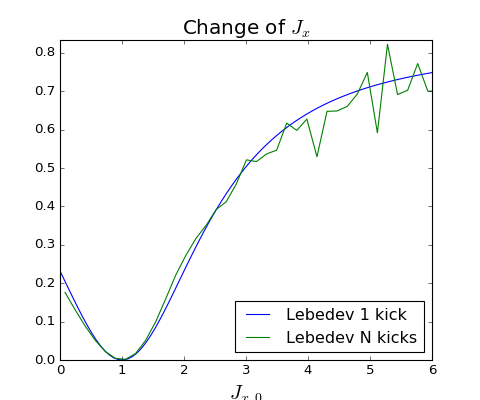

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


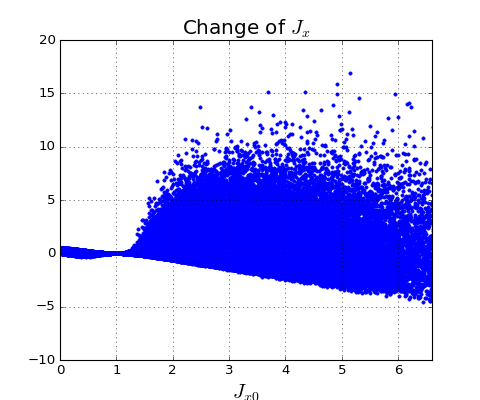

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


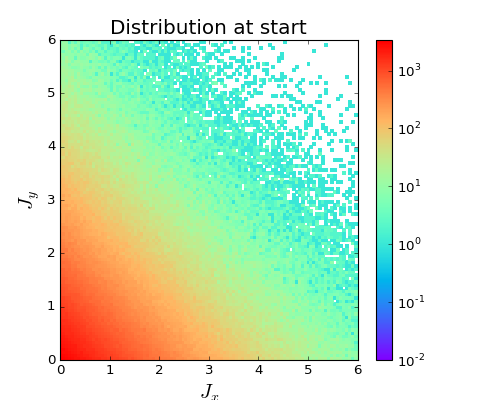

<IPython.core.display.Javascript object>


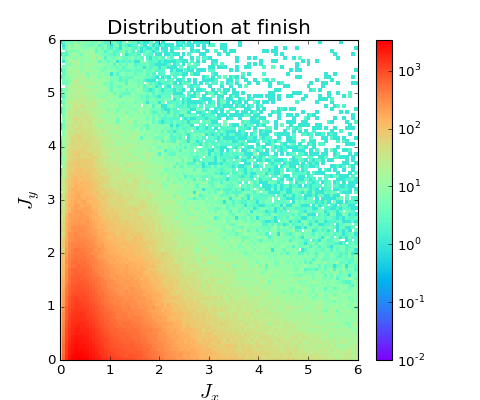

<IPython.core.display.Javascript object>


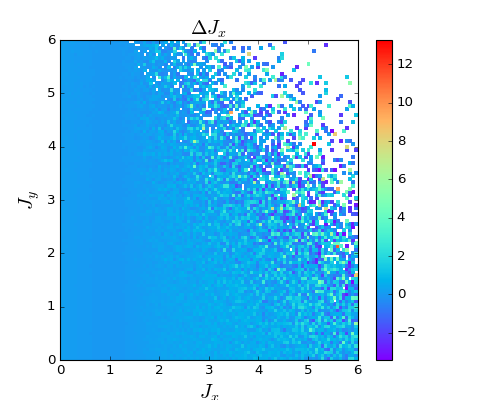

<IPython.core.display.Javascript object>


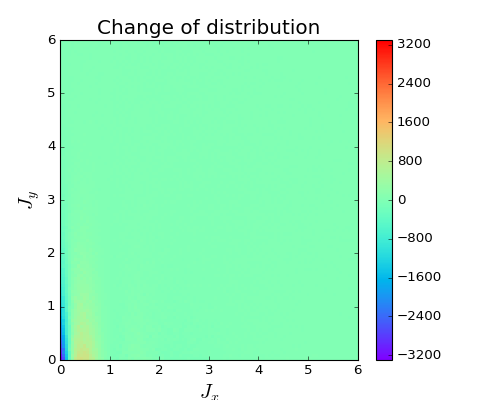

<IPython.core.display.Javascript object>


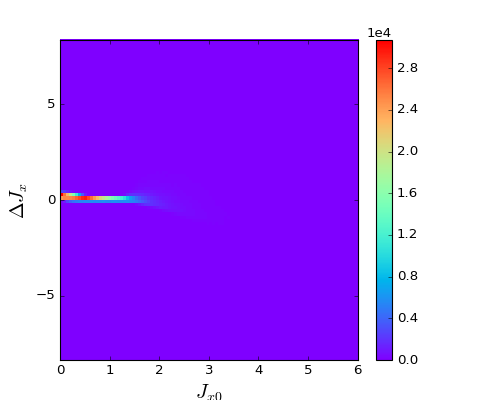

In [9]:
plt.figure()
plt.xlabel(r'$J_{x,0}$')
plt.title(r"Change of $J_x$")
xx=Jx0
W,edges = np.histogram(xx,bins=edges)
vals,_ = np.histogram(xx,bins=edges,weights=Jx-Jx0)
vals = vals/W

leb1=np.zeros_like(x)
for i,J in enumerate(x):
    leb1[i] = integrate.quad(intJy_octu_leb,0,100,args = (J,a,b,g))[0]


plt.plot(x, dJx_exp*numt*leb1,label='Lebedev 1 kick')
# plt.plot(x,dJx_exp*numt*octu_leb(x,0,a,b,g),label='Lebedev')
plt.plot(center_edges(edges),vals,label='Lebedev N kicks')
# plt.hist(Jx0,bins=edges,histtype='step',weights=Jx-Jx0,label='Numerical');
# plt.ylim(0,0.4)
l1,l2 = plt.ylim()
plt.ylim(max(l1,0),min(l2,dJx_exp*numt))
plt.xlim(0,Jmax)
plt.legend(loc=0)
plt.savefig("03_Plots/DACT_Lebedev_OPa%.0e_OPb%.0e_nt%d_np%d_Kx%.0e.eps"%(a,b,numt,N,sepx))
plt.savefig("03_Plots/DACT_Lebedev_OPa%.0e_OPb%.0e_nt%d_np%d_Kx%.0e.png"%(a,b,numt,N,sepx))

# # Plot 2d
# plt.pcolor(JX,JY,F,norm =LogNorm(vmin=vmin,vmax=vmax))
# plt.colorbar(label=r'Reduction of $\Delta J_x$')
# plt.title(r"$a=%.0e$, $b=%.0e$, $g=%.2f$"%(a,b,g)+'\n')
# plt.xlabel(r'$J_x$')
# plt.ylabel(r'$J_y$')

plt.figure()
plt.xlabel(r'$J_{x0}$')
plt.title(r"Change of $J_x$")
plt.plot(Jx0,Jx-Jx0,'.')
plt.xlim(0,Jmax*1.1)
plt.grid(True)

###################################################################
################ PCOLOR with NANS #################################
###################################################################

H0,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=weights);
H0=H0.transpose()
X,Y = np.meshgrid(xedges,yedges)

H1,xedges,yedges = np.histogram2d(Jx,Jy,nbin2,range=[[0,Jmax],[0,Jmax]],weights=weights);
H1=H1.transpose()

# H2,xedges,yedges = np.histogram2d(Jx0,Jx-Jx0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=weights);
# H2=H1.transpose()


DJx = Jx-Jx0
# H3,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=DJx);
W,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]]); #weights=1
H3,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=DJx);
H3=(H3/W).transpose()


# F = H3/H1 # (H2-H1)/H1
FS = [H0,H1,H3,H1-H0]
for i,F in enumerate(FS):
#     if i==3: continue
    F = np.ma.masked_where(np.isnan(F), F)
    # F = np.ma.masked_where(np.nonzero(F), F)
    
    plt.figure()
    plt.title(["Distribution at start", "Distribution at finish", r"$\Delta J_x$","Change of distribution"][i])
    if i==3 or i ==2:
        vmax =np.nanmax(np.abs(F))
        vmin=np.nanmin(F)
        plt.pcolor(X,Y,F,vmin=vmin,vmax=vmax)
    else:
        vmax =np.nanmax(np.abs(F))
        vmin=[1,1,1e-3][dist]
        vmin=1e-2
        if i==2:
            vmin=1
        plt.pcolor(X,Y,F,norm =LogNorm(vmin=vmin,vmax=vmax))
    
    plt.colorbar()
    plt.xlabel(r'$J_x$')
    plt.ylabel(r'$J_y$')
    
    
plt.figure()    
plt.ylabel(r"$\Delta J_x$")
plt.xlabel(r'$J_{x0}$')
lim = numt*dJx_exp*1e1
plt.hist2d(Jx0,Jx-Jx0,nbin2,range=[[0,Jmax],[-lim,lim]],weights=weights);
plt.colorbar()

In [242]:
print(np.max(Jx-Jx0))
np.cos(pi2*np.random.uniform(0,1,N)) 
print(Jx0)

12.4557897619
[ 5.65624131  2.75016417  4.42426276 ...,  5.51908178  5.9597329
  3.78278052]


## Change of lebedev curve
We see an improvement with regards to expectations with just multiple kicks based on the average. <br>

However, we see that the  +- behavior destroys this. and I do not perfectly understand how it is affected by the

<IPython.core.display.Javascript object>


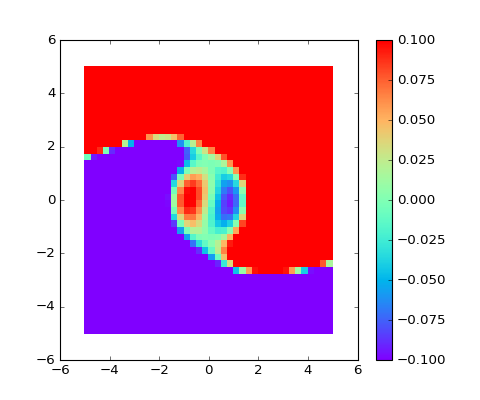

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:54: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 0.91997003  2.21654009 -1.91188643 ..., -0.08031215 -2.06825314
 -0.5592575 ]
[ 1.4911687   2.78773876 -1.34068776 ...,  0.49088652 -1.49705448
  0.01194117]
[ 2.06236736  3.35893742 -0.7694891  ...,  1.06208518 -0.92585581
  0.58313983]
[ 2.63356603  3.93013609 -0.19829044 ...,  1.63328384 -0.35465715
  1.1543385 ]
[ 3.20476469  4.50133475  0.37290823 ...,  2.20448251  0.21654152
  1.72553716]
[ 3.77596336  5.07253342  0.94410689 ...,  2.77568117  0.78774018
  2.29673582]
[ 4.34716202  5.64373208  1.51530556 ...,  3.34687984  1.35893885
  2.86793449]
[ 4.91836068  6.21493074  2.08650422 ...,  3.9180785   1.93013751
  3.43913315]
[ 5.48955935  6.78612941  2.65770289 ...,  4.48927717  2.50133617
  4.01033182]
[ 6.06075801  7.35732807  3.22890155 ...,  5.06047583  3.07253484
  4.58153048]


<IPython.core.display.Javascript object>


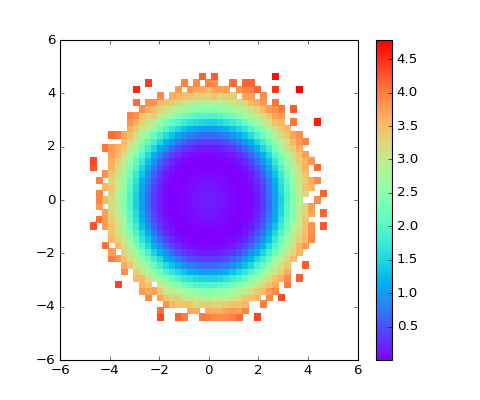

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:90: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


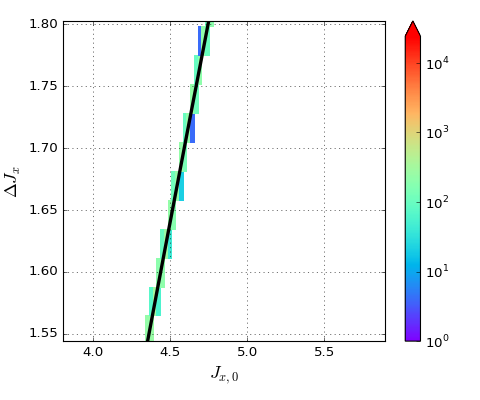

<IPython.core.display.Javascript object>


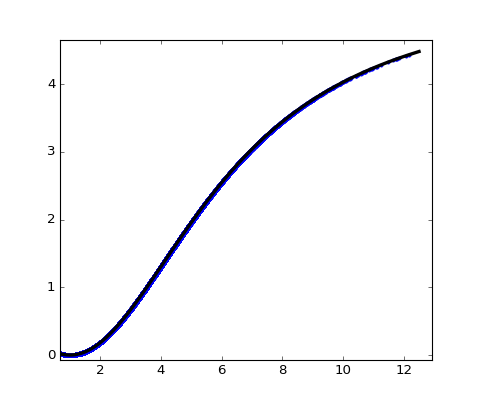

In [37]:
a = 1e-4*3
g = 2e-2 *1
g2=g/2
maxX = 5
dp = 1
N=41
Q0 = 0.31
avgJ = 1

x= np.linspace(-1,1,N)*maxX
Xe,Pe = np.meshgrid(x,x)
X,P = np.meshgrid(center_edges(x),center_edges(x))


J0 = 0.5*(X**2+P**2) 
J0K= 0.5*(X**2+(P+dp)**2) 
dmu = pi2*a*(J0-avgJ)
sindmu = np.sin(dmu)  ;  sindmu2= np.sin(dmu/2)
JN = J0 + 0.5*(dp**2*((1-g2)**2*4*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2))
JN += dp*(1-g2)*(X*g2*sindmu+P*(4-g)*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)

# sindmu = np.sin(dmu+pi2*a) ;  sindmu2= np.sin(dmu/2+pi2*a/2)
# JN += .5*dp*(1-g2)*(X*g2*sindmu+P*(4-g)*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)

# JN += np.real((X-1j*P)*1j*dp*((1-g2)*(1-np.exp(1j*dmu)))/(1-(1-g2)*np.exp(1j*dmu)))
# T=1-g2
# JN += np.real((X-1j*P)*1j*dp*(T*(1-np.exp(1j*dmu))*(1-T*np.exp(-1j*dmu)))/((1-(1-g2)*np.exp(1j*dmu))*(1-T*np.exp(-1j*dmu))))
# JN += np.real((X-1j*P)*1j*dp*T*(1+T-2*np.cos(dmu) + g2*np.exp(-1j*dmu))/(1+T**2-2*T*np.cos(dmu)))
# JN += np.real((X-1j*P)*1j*dp*T*(4*sindmu2**2+g2*(-1+np.exp(-1j*dmu)))/(1+T**2-2*T*np.cos(dmu)))
    

J0l = np.linspace(0,0.5*maxX**2,N*10)
dmul = pi2*a*(J0l-avgJ)
sindmul = np.sin(dmul)  ;  sindmul2= np.sin(dmul/2)
JNavg=J0l + 0.5*(dp**2*((1-g2)**2*4*sindmul2**2)/(g2**2+4*(1-g2)*sindmul2**2))

# plt.figure()
# plt.pcolor(Xe,Pe,J0)
# plt.colorbar()

# plt.figure()
# plt.pcolor(Xe,Pe,JN)
# plt.colorbar()

plt.figure()
vmax= 0.1
plt.pcolor(Xe,Pe,JN-J0,vmin=-vmax,vmax=vmax)
# plt.pcolor(Xe,Pe,J0K-J0)
plt.colorbar()


NP = 1e6
X=np.random.normal(0,1,NP)
P=np.random.normal(0,1,NP)
phi0 = np.arctan2(P,X)
theta = phi0
J0 = 0.5*(X**2+P**2) 
# X==np.sqrt(2*J0)*np.cos(phi0)
J0K= 0.5*(X**2+(P+dp)**2)
dmu = pi2*a*(J0-avgJ)
sindmu = np.sin(dmu)  ;  sindmu2= np.sin(dmu/2)
JN = J0 + 0.5*(dp**2*((1-g2)**2*4*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)) 
JN += dp*(1-g2)*(X*g2*sindmu+P*(4-g)*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)

if 1:
    nsteps = 10
    for i in range(nsteps):
#         theta = np.random.uniform(0,2*np.pi,NP)
#         theta += 1000*(0+a*JN)
        theta += pi2/(nsteps+1)
        print(theta)
        
        
#         Jx = JN ;  meanJ = np.mean(JN)
        Jx = J0 ;  meanJ = np.mean(J0)
        
        
        dmu=pi2*a*(Jx-meanJ)
        sindmu = np.sin(dmu)  ;  sindmu2= np.sin(dmu/2)
        
        JN += dp*(1-g2)*(np.sqrt(2*Jx)*np.cos(theta)*g2*sindmu+np.sqrt(2*Jx)*np.sin(theta)*(4-g)*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)
        JN += 0.5*(dp**2*((1-g2)**2*4*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)) 
        
        JNavg += 0.5*(dp**2*((1-g2)**2*4*sindmul2**2)/(g2**2+4*(1-g2)*sindmul2**2))

#x px histogram
plt.figure()
W,xedges,yedges = np.histogram2d(X,P,N,range=[[-maxX,maxX],[-maxX,maxX]]); #weights=1
H3,xedges,yedges = np.histogram2d(X,P,N,range=[[-maxX,maxX],[-maxX,maxX]],weights=JN-J0);
H3=(H3/W).transpose()
X,Y = np.meshgrid(xedges,yedges)
F=H3
F = np.ma.masked_where(np.isnan(F), F)
vmax =np.nanmax(np.abs(F))
vmin=np.nanmin(F)
plt.pcolor(X,Y,F,vmin=vmin,vmax=vmax)
plt.colorbar()

#djx,jx histogram
plt.figure()
# W,xedges,yedges = np.histogram2d(J0,JN-J0,N,range=[[0,6],[-dp**2*0.5,dp**2*0.5]]); #weights=1
vmax = np.min(np.max(JN-J0))
H,xedges,yedges = np.histogram2d(J0,JN-J0,N*10,range=[[0,10],[-vmax,vmax]]);
H = H.transpose()

vmax = H.max()
vmin = np.min(H[H>0])

X,Y = np.meshgrid(xedges, yedges);
pcm=plt.pcolor(X,Y,H,norm =LogNorm(vmin=vmin,vmax=vmax),cmap='rainbow');
plt.colorbar(pcm,  extend='max')
plt.xlabel(r'$J_{x,0}$',fontsize=16)
plt.ylabel(r'$\Delta J_x$',fontsize=16)
plt.grid(True)
plt.plot(J0l,JNavg-J0l,'k',lw=3)
plt.tight_layout()
    

plt.figure()
plt.plot(J0,JN-J0,'.')
# plt.plot(J0,J0K-J0,'.')
plt.plot(J0l,JNavg-J0l,'k',lw=3)


In [103]:
(1+1j)/(1-1j)

1j

In [93]:
np.cos(0.1)

0.99500416527802582